In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer_data = load_breast_cancer()

In [4]:
data = cancer_data.data

In [5]:
target = cancer_data.target

In [6]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
import pandas as pd

In [8]:
cancer_df = pd.DataFrame(data = data,columns=cancer_data.feature_names)

In [9]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [14]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train[:5,:]

array([[-0.12348985, -0.29680142, -0.17050713, -0.20861569, -1.2016799 ,
        -0.7731696 , -0.76231194, -0.93324109, -1.22994935, -0.94816603,
        -0.53359339, -0.86028757, -0.61678096, -0.39177533, -1.35556152,
        -0.52503193, -0.4817033 , -0.97940018, -0.88459317, -0.68548672,
        -0.19761978, -0.5067476 , -0.30791001, -0.27357592, -1.50742388,
        -0.44926047, -0.57223884, -0.84082156, -0.8563616 , -0.76574773],
       [-0.22826757, -0.65795149, -0.25377521, -0.2965028 , -1.80463697,
        -0.58761605, -0.09198533, -0.54268359, -1.41998468, -0.61249143,
        -0.83040055, -0.12266723, -0.78254381, -0.53126109, -0.36490698,
         0.40861926,  0.57668457, -0.2482875 , -1.03572382,  0.10768859,
        -0.42291745, -0.45849468, -0.4652873 , -0.43812681, -1.27301714,
         0.02704209,  0.31804488, -0.37706655, -1.3415819 , -0.41480748],
       [ 0.14553402, -1.23056444,  0.24583328, -0.01024193,  0.5191843 ,
         1.57000613,  0.73231958,  0.38658307,  1

In [16]:
import keras

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [18]:
model = Sequential([
    Dense(units=15,kernel_initializer='uniform',activation='relu',input_shape=(30,)),
    Dropout(0.4),
    Dense(units=8,kernel_initializer='uniform',activation='relu'),
    Dense(units=4,kernel_initializer='uniform',activation='relu'),
    Dense(units=2,kernel_initializer='uniform',activation='relu'),
    Dense(units=1,kernel_initializer='uniform',activation='sigmoid')
    
])

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
h = model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
398/398 [==============================] - 6s 15ms/step - loss: 0.6912 - acc: 0.6156
Epoch 2/100
398/398 [==============================] - 0s 341us/step - loss: 0.6876 - acc: 0.6256
Epoch 3/100
398/398 [==============================] - 0s 300us/step - loss: 0.6845 - acc: 0.6256
Epoch 4/100
398/398 [==============================] - 0s 253us/step - loss: 0.6819 - acc: 0.6256
Epoch 5/100
398/398 [==============================] - 0s 273us/step - loss: 0.6796 - acc: 0.6256
Epoch 6/100
398/398 [==============================] - 0s 319us/step - loss: 0.6776 - acc: 0.6256
Epoch 7/100
398/398 [==============================] - 0s 329us/step - loss: 0.6756 - acc: 0.6256
Epoch 8/100
398/398 [==============================] - 0s 252us/step - loss: 0.6739 - acc: 0.6256
Epoch 9/100
398/398 [==============================] - 0s 305us/step - loss: 0.6724 - acc: 0.6256
Epoch 10/100
398/398 [==============================] - 0s 285us/step - loss: 0.6710 - acc: 0.6256
Epoch 11/100
398/398

In [21]:
pred = model.predict_classes(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,coverage_error

In [23]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        63
          1       0.63      1.00      0.77       108

avg / total       0.40      0.63      0.49       171



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
print(confusion_matrix(y_test,pred))

[[  0  63]
 [  0 108]]


In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

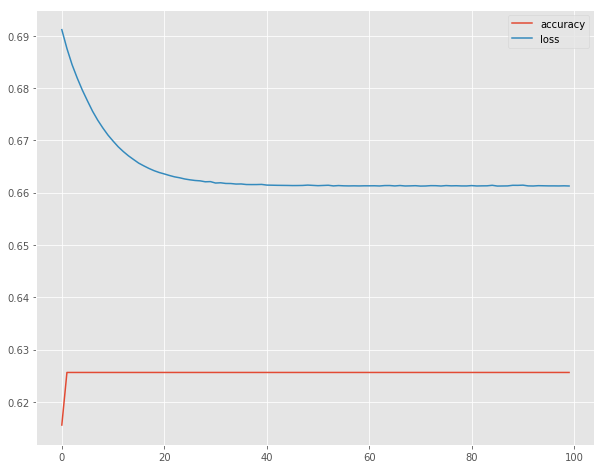

In [26]:
plt.figure(figsize=(10,8))
plt.plot(model.history.epoch,model.history.history['acc'],label='accuracy')
plt.plot(model.history.epoch,model.history.history['loss'],label='loss')

plt.legend()

In [27]:
h == model

False

In [28]:
type(model)

keras.engine.sequential.Sequential

In [29]:
model.save_weights('cancer_weights')

In [30]:
h.history['acc']

[0.615577889746757,
 0.6256281407035176,
 0.6256281404039967,
 0.6256281407783978,
 0.625628140853278,
 0.6256281410030384,
 0.6256281410030384,
 0.6256281407035176,
 0.6256281404039967,
 0.6256281410030384,
 0.6256281404039967,
 0.6256281407035176,
 0.6256281410030384,
 0.6256281410030384,
 0.6256281410030384,
 0.6256281407035176,
 0.625628140853278,
 0.6256281407035176,
 0.625628140853278,
 0.6256281407783978,
 0.6256281407035176,
 0.6256281407783978,
 0.625628140853278,
 0.6256281410030384,
 0.6256281407035176,
 0.625628140853278,
 0.6256281410030384,
 0.6256281404039967,
 0.6256281407035176,
 0.625628140853278,
 0.625628140853278,
 0.6256281410030384,
 0.6256281407035176,
 0.6256281410030384,
 0.6256281407035176,
 0.625628140853278,
 0.625628140853278,
 0.6256281407035176,
 0.6256281407035176,
 0.6256281407035176,
 0.6256281410030384,
 0.625628140853278,
 0.6256281407035176,
 0.6256281407035176,
 0.6256281407035176,
 0.6256281404039967,
 0.6256281410030384,
 0.6256281407035176,
 0.

In [31]:
from keras.utils import plot_model

In [32]:
model1 = Sequential([
    Dense(units=15,kernel_initializer='uniform',activation='relu',input_shape=(30,)),
    Dropout(0.6),
    Dense(units=4,kernel_initializer='uniform',activation='relu'),
    Dense(units=1,kernel_initializer='uniform',activation='sigmoid')
    
])

In [33]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
history = model1.fit(X_train,y_train,batch_size=10,epochs=100,validation_split=0.25,verbose=1,validation_data=(X_test,y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 1s 2ms/step - loss: 0.6896 - acc: 0.6206 - val_loss: 0.6819 - val_acc: 0.6316
Epoch 2/100
398/398 [==============================] - 0s 345us/step - loss: 0.6618 - acc: 0.6935 - val_loss: 0.6147 - val_acc: 0.8713
Epoch 3/100
398/398 [==============================] - 0s 303us/step - loss: 0.5453 - acc: 0.8869 - val_loss: 0.4319 - val_acc: 0.9474
Epoch 4/100
398/398 [==============================] - 0s 298us/step - loss: 0.3801 - acc: 0.9271 - val_loss: 0.2571 - val_acc: 0.9415
Epoch 5/100
398/398 [==============================] - 0s 284us/step - loss: 0.2701 - acc: 0.9472 - val_loss: 0.1671 - val_acc: 0.9532
Epoch 6/100
398/398 [==============================] - 0s 275us/step - loss: 0.1964 - acc: 0.9422 - val_loss: 0.1240 - val_acc: 0.9649
Epoch 7/100
398/398 [==============================] - 0s 275us/step - loss: 0.1845 - acc: 0.9397 - val_loss: 0.1000 - val_acc: 0.9766
Epoch 8/100

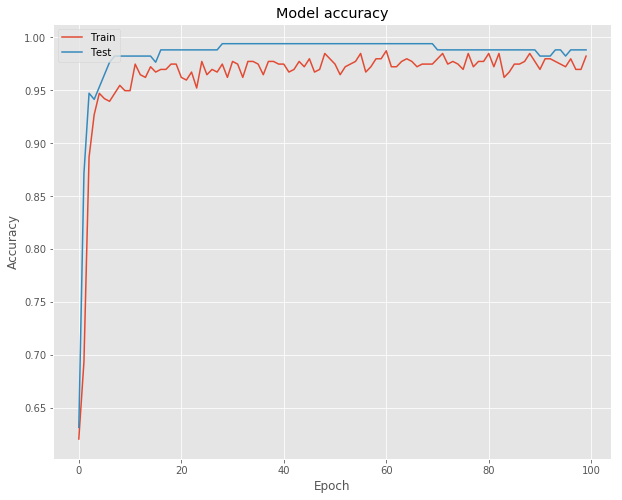

In [35]:
plt.figure(figsize=(10,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

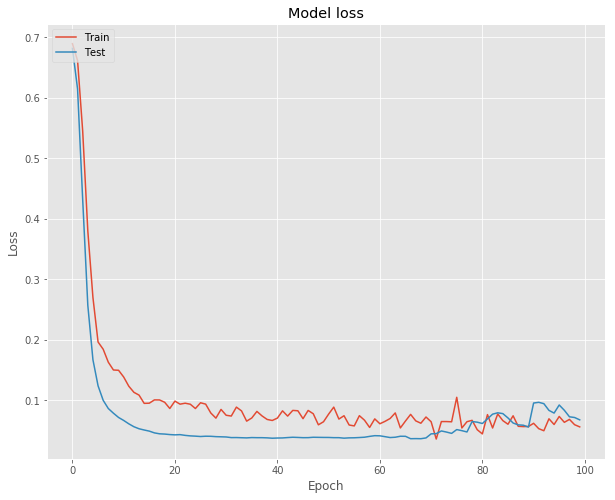

In [36]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [37]:
pred1 = model1.predict_classes(X_test)
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

[[ 62   1]
 [  1 107]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        63
          1       0.99      0.99      0.99       108

avg / total       0.99      0.99      0.99       171



In [38]:
from sklearn.datasets import make_circles

In [39]:
xs , ys= make_circles(200,noise=0.015)

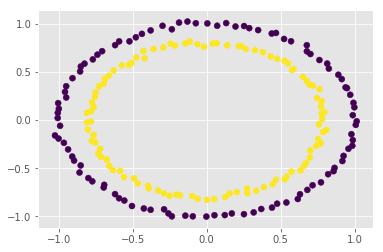

In [40]:
plt.scatter(xs[:,0],xs[:,1],c=ys)

In [41]:
from mpl_toolkits.mplot3d import Axes3D 

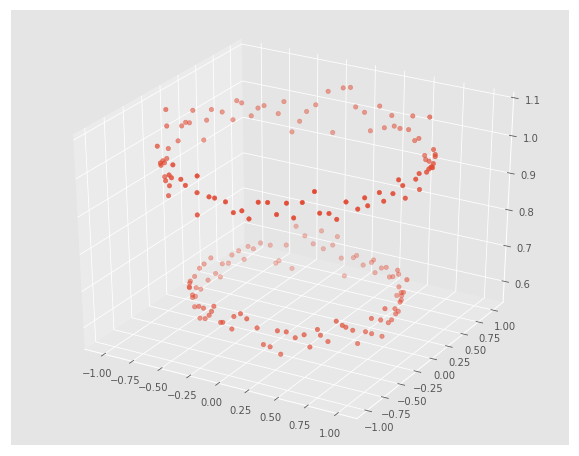

In [42]:
fig = plt.figure(figsize=(10,8))
axes = fig.add_subplot(111,projection='3d')
axes.scatter(xs[:,0],xs[:,1], xs[:,1]**2 + xs[:,0]**2,cmap='gray')

In [43]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [44]:
model1.save("cancer_calssifier_best")